In [1]:

import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython.display import display, HTML
import cv2
    

In [2]:

student_id = input("Enter your student id")
student_name = input("Enter your name")
print("STUDENT ID", student_id)
print("STUDENT NAME", student_name)


STUDENT ID 61275048H
STUDENT NAME Patrick Bao


<!-- <div class="question_frame"> --><!-- start of question_frame -->



<h1>Map Navigation - Setup</h1>
<div class="question_body">

<p>Given is a set of cities with the coordinates as shown below</p>

<code>
map_points = [[70,60],[20,20],[20,40],[10,40],[70,40],[50,40],[60,80],[30,80],[20,80],[60,30],[40,30]]
</code>

<p>The cities are connected through the following set of roads. Each entry in the road network
shows the index of start and end city that are connected by this road</p>
<code>
map_roads = [[0,5],[6,9],[0,3],[0,2],[2,5],[2,7],[3,4],[5,8],[4,7],[1,8],[3,5],[5,9],[0,9],[1,2],[1,6],[0,1],[1,4],[3,9],[3,8],[2,8],[2,4],[5,6]]
</code>

<p>A map of the navigation problem is shown in the figure below.</p>


<a download="Navigation Domain" href="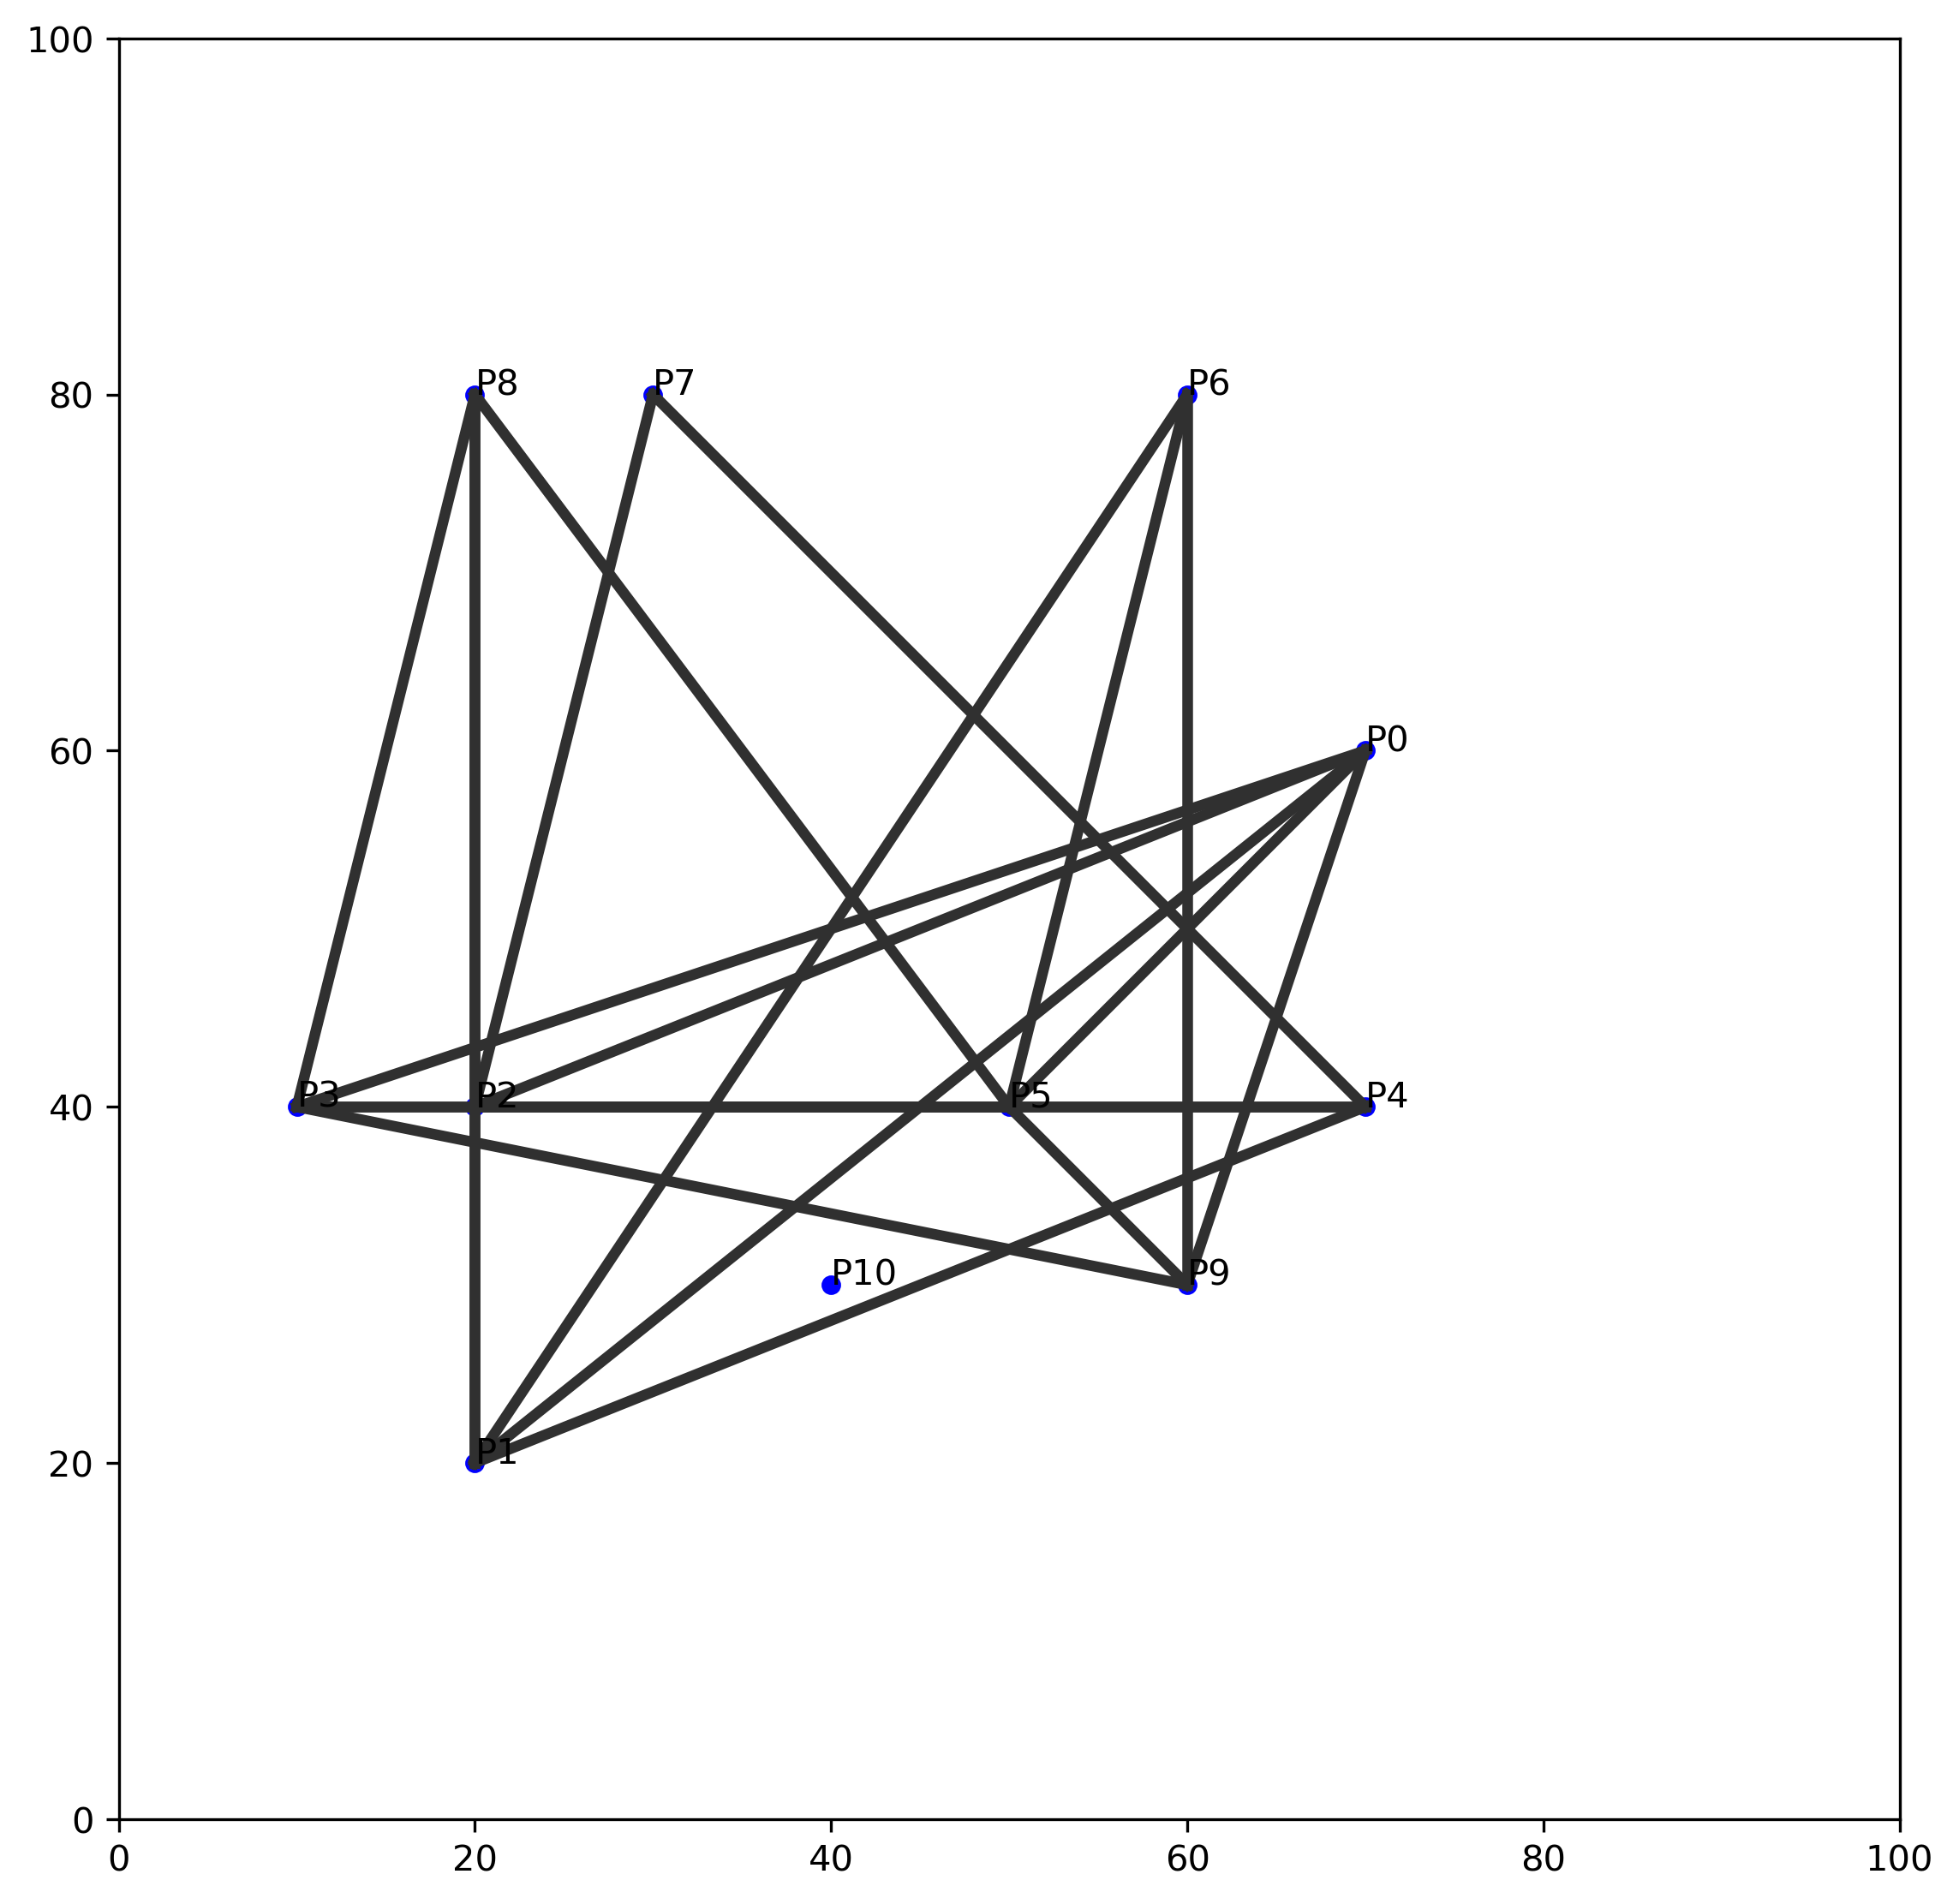">


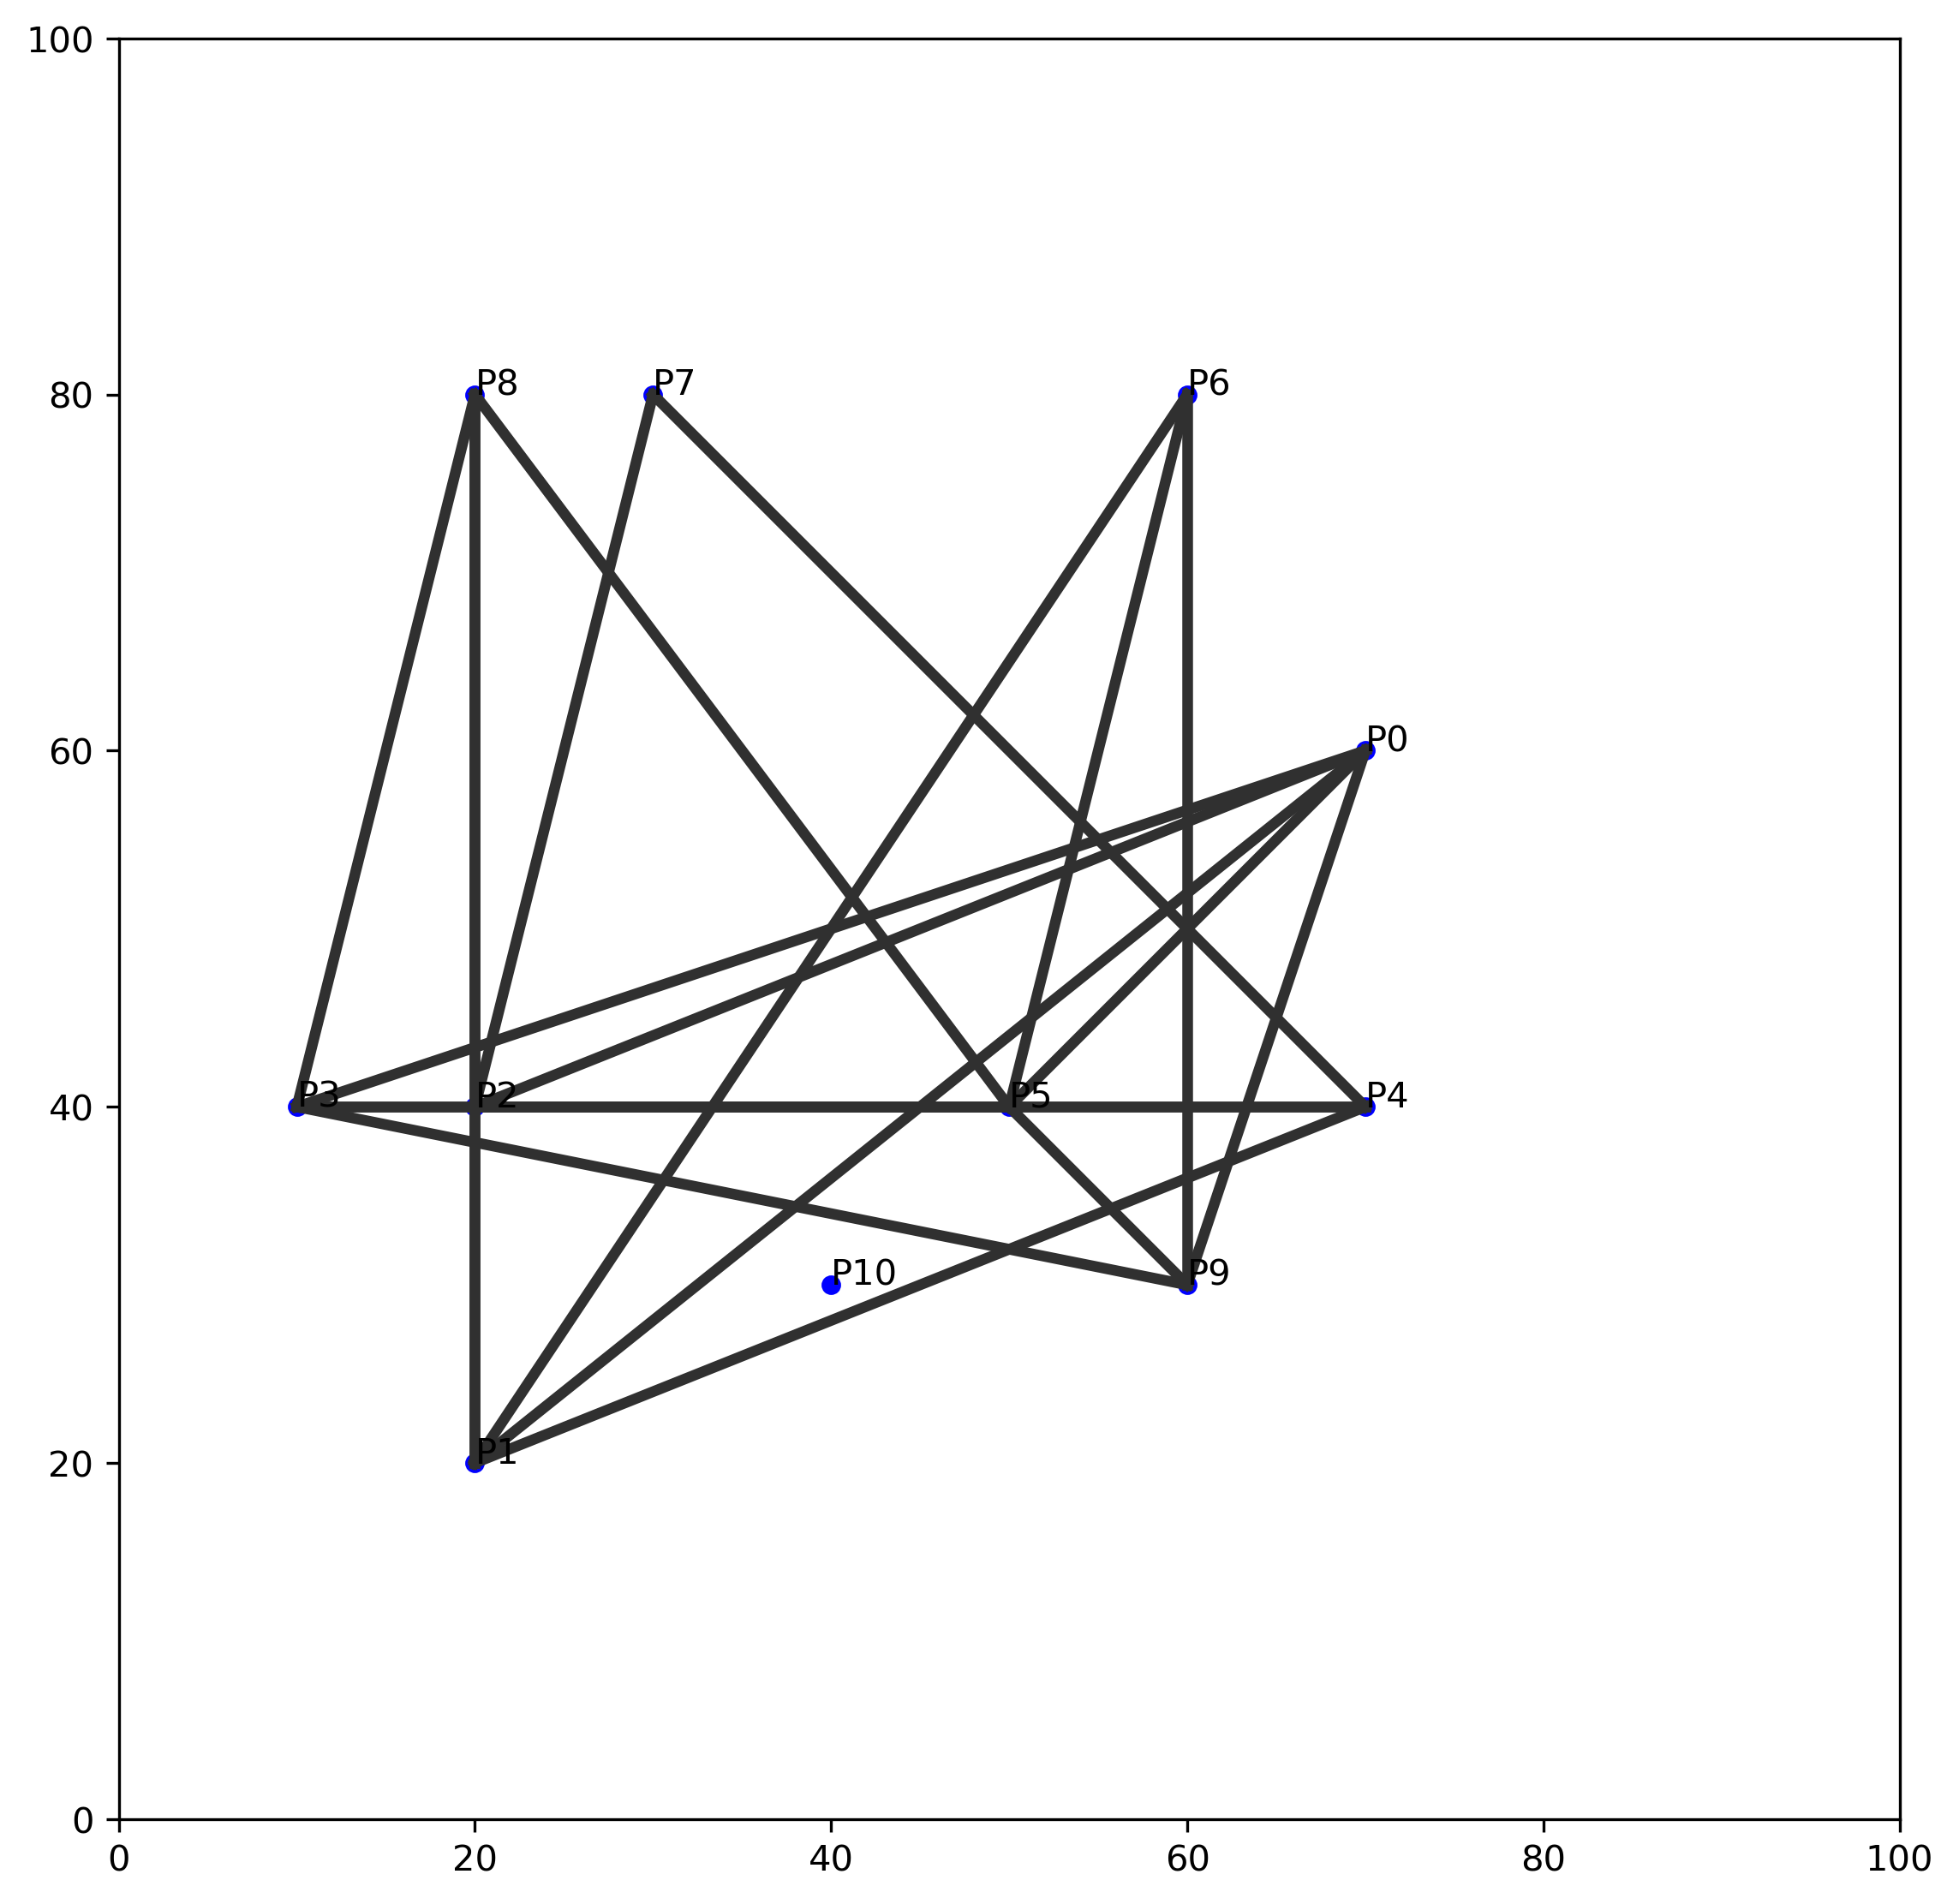

</a>


</div><!-- end of question_body -->


In [4]:

def a_star_search( initial, successor_func, is_goal_func, heur_func, node_limit = 1000, depth_limit = None, ax = None ):
    queue = [ ( initial, heur_func(initial), 0, [initial] ) ]
    num_nodes = 1
    max_queue = 0
    sol = None
    visited = [ ]
    frames = []

    #print("Search started", queue)
    while( len( queue ) > 0 ):
        #queue = queue[0:-1]
        #print("Q", queue)
        if ( len(queue) > max_queue ):
              max_queue = len(queue)
        current, current_h, current_g, chist = queue.pop()
        visited.append( current )
        if ax is not None:
          #print('visited', visited )
          frame = drawEnvironment( ax, env, visited )
          frames.append( frame )

        #print('   ' * len(chist), current, '[', chist, ']' )
        #print("Num Nodes", numNodes)
        #print( len(chist), depthLimit, printState( current ) )
        if is_goal_func( current ):
            sol = chist
            break
        if ( depth_limit is None ) or ( len(chist) <= depth_limit ):
            # print("current state", current, current_h, current_g, chist )
            # print("queue", queue)
            children = successor_func( current )
            #print("children", children)
            for child in children:
                c, cost = child
                if c not in chist:
                    #print("Add child", printState(c))
                    h = heur_func( c )
                    g = current_g + cost
                    pos = 0
                    for i in range(len(queue)-1, -1, -1 ):
                      if ( queue[i][1] + queue[i][2] >= h + g ):
                        pos = i + 1
                        break
                    queue.insert(pos, (c, h, g, chist + [c] ))
                    num_nodes = num_nodes + 1
                    if ( num_nodes > node_limit ):
                        #print("search terminated with num_nodes", num_nodes )
                        return ( num_nodes, max_queue, None )
        # else:
        #   print("Depth cutoff", len(chist), ">", depth_limit )
    return ( num_nodes, max_queue, sol, frames )



<div class="question_marks">
<span class="mark_num" style="text-align:right">5</span> marks
</div><!-- end of question_marks -->



<p>Find the minimum and maximum length of a road in this map</p>

<p>The minimum length of a road is: 14.1421</p>

<p>The maximum length of a road is: 72.111</p>
</p>


<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

calculate map_roads all distance([0,5] is like city0 to city5), and can find the max & min distance

In [5]:
import math

map_points = [[70, 60], [20, 20], [20, 40], [10, 40], [70, 40], [50, 40], 
              [60, 80], [30, 80], [20, 80], [60, 30], [40, 30]]

map_roads = [[0, 5], [6, 9], [0, 3], [0, 2], [2, 5], [2, 7], [3, 4], [5, 8], 
             [4, 7], [1, 8], [3, 5], [5, 9], [0, 9], [1, 2], [1, 6], [0, 1], 
             [1, 4], [3, 9], [3, 8], [2, 8], [2, 4], [5, 6]]

def euclidean_distance(city1, city2):
    p1 = map_points[city1]
    p2 = map_points[city2]
    #print(p1,p2)
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

distances = []

for road in map_roads:
    distance = euclidean_distance(road[0], road[1])
    #print([road[0]],[road[1]])
    distances.append(distance)

min_distance = min(distances)
max_distance = max(distances)

print(min_distance,max_distance)

14.142135623730951 72.11102550927978


<!-- </div> --><!-- end of question_frame -->


<!-- <div class="question_frame"> --><!-- start of question_frame -->



<h1>Map Navigation - A* Search</h1>
<div class="question_body">

<p>
Show a trace of the A* search algorithm using the <span class="important">Euclidean distance</span> as a heuristic function.
</p>

<p>You start at city P9 and finish at city P2</p>

</div><!-- end of question_body -->



<div class="question_marks">
<span class="mark_num" style="text-align:right">15</span> marks
</div><!-- end of question_marks -->



Trace of A* Search from P9 to P2
P9 h=41.23, g=0   A:
Nodes explored: 10
Maximum queue size: 8
Solution path: [9, 5, 2]




<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

A* Search Result:
Nodes explored: 10
Maximum queue size: 8
Solution path: [9, 5, 2]


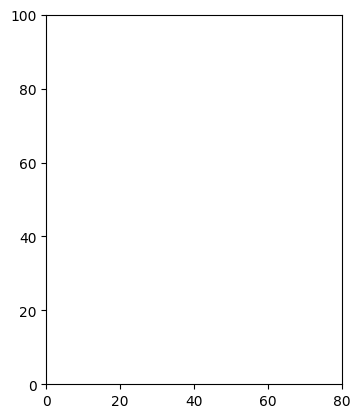

In [7]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

map_points = [[70, 60], [20, 20], [20, 40], [10, 40], [70, 40], [50, 40], 
              [60, 80], [30, 80], [20, 80], [60, 30], [40, 30]]

map_roads = [[0, 5], [6, 9], [0, 3], [0, 2], [2, 5], [2, 7], [3, 4], [5, 8], 
             [4, 7], [1, 8], [3, 5], [5, 9], [0, 9], [1, 2], [1, 6], [0, 1], 
             [1, 4], [3, 9], [3, 8], [2, 8], [2, 4], [5, 6]]

def euclidean_distance(p1, p2):
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

def successor_func(city):
    successors = []
    for road in map_roads:
        if road[0] == city:
            successors.append((road[1], euclidean_distance(map_points[city], map_points[road[1]])))
        elif road[1] == city:
            successors.append((road[0], euclidean_distance(map_points[city], map_points[road[0]])))
    return successors


def is_goal_func(city):
    return city == 2  

def heuristic_func(city):
    return euclidean_distance(map_points[city], map_points[2])  

def a_star_search(initial, successor_func, is_goal_func, heur_func, node_limit=1000, depth_limit=None, ax=None):
    queue = [(initial, heur_func(initial), 0, [initial])]
    num_nodes = 1
    max_queue = 0
    sol = None
    visited = []
    frames = []

    while len(queue) > 0:
        if len(queue) > max_queue:
            max_queue = len(queue)
        
        current, current_h, current_g, chist = queue.pop()
        visited.append(current)
        
        #if ax is not None:
        #    frame = drawEnvironment(ax, env, visited)
        #    frames.append(frame)
        
        if is_goal_func(current):
            sol = chist
            break
        
        if depth_limit is None or len(chist) <= depth_limit:
            children = successor_func(current)
            for child in children:
                c, cost = child
                if c not in chist:
                    h = heur_func(c)
                    g = current_g + cost
                    pos = 0
                    for i in range(len(queue) - 1, -1, -1):
                        if queue[i][1] + queue[i][2] >= h + g:
                            pos = i + 1
                            break
                    queue.insert(pos, (c, h, g, chist + [c]))
                    num_nodes += 1
                    if num_nodes > node_limit:
                        return num_nodes, max_queue, None
    
    return num_nodes, max_queue, sol, frames

def drawEnvironment(ax, env, visited):
    return None

initial = 9
goal = 2
node_limit = 1000
depth_limit = None
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set_xlim(0, 80)
ax.set_ylim(0, 100)

num_nodes, max_queue, solution, frames = a_star_search(initial, successor_func, is_goal_func, heuristic_func, node_limit, depth_limit, ax)

print("A* Search Result:")
print("Nodes explored:", num_nodes)
print("Maximum queue size:", max_queue)
print("Solution path:", solution)

def animate(i):
    ax.clear()
    frame = frames[i]
    ax.imshow(frame)
    ax.set_title(f'Frame {i}')
    return ax

if frames:
    ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=500, blit=False)
    plt.show()


<!-- </div> --><!-- end of question_frame -->
